<a href="https://colab.research.google.com/github/Vayansh/Digit_recognition/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Getting Dataset and prepare it for preprocessing**

### **1.1 Importing Libraries**

In [ ]:
!pip install tqdm

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
import pandas as pd
import os

### **1.2 Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  Unzipping dataset
!unzip "/content/drive/MyDrive/digit_image_dataset.zip"

## **1.3 Forming DataFrame of filepaths and labels**

**Displaying a sample image of dataset**

In [ ]:
dataset = "/content/digit_image_dataset/Dataset"
img = cv.imread(dataset+"/_/0.png",0)
print(img.shape)

(100, 100)

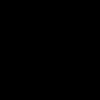

In [ ]:
cv2_imshow(img)

In [ ]:
IMG_SIZE = (100,100)        # target size of image

In [ ]:
# building a dataframe of filepaths and labels so as to input to a Image data generator
df = []
for i in range(0,10):
  folder = f"{i}"
  path = os.path.join(dataset,folder)
  for j in os.listdir(path):
    dic = {'filepath': os.path.join(dataset,folder,f"{j}") , 'label': f"{i}"}
    df.append(dic)
folder = f"_"
path = os.path.join(dataset,folder)
for j in os.listdir(path):
    dic = {'filepath': os.path.join(dataset,folder,f"{j}") , 'label': "_"}
    df.append(dic)
df = pd.DataFrame(df)
df.head()

,filepath,label
0,/content/digit_image_dataset/Dataset/0/149.png,0
1,/content/digit_image_dataset/Dataset/0/239.png,0
2,/content/digit_image_dataset/Dataset/0/171.png,0
3,/content/digit_image_dataset/Dataset/0/80.png,0
4,/content/digit_image_dataset/Dataset/0/91.png,0


In [ ]:
# Resuffling the dataset
df = df.sample(frac = 1)

In [ ]:
df.head(20)

,filepath,label
5348,/content/digit_image_dataset/Dataset/_/227.png,_
218,/content/digit_image_dataset/Dataset/0/203.png,0
5256,/content/digit_image_dataset/Dataset/_/43.png,_
2593,/content/digit_image_dataset/Dataset/5/391.png,5
1145,/content/digit_image_dataset/Dataset/2/169.png,2
2751,/content/digit_image_dataset/Dataset/5/404.png,5
1877,/content/digit_image_dataset/Dataset/3/406.png,3
4793,/content/digit_image_dataset/Dataset/9/484.png,9
4973,/content/digit_image_dataset/Dataset/9/19.png,9
660,/content/digit_image_dataset/Dataset/1/457.png,1


In [ ]:
# Checking balancing of dataset
df['label'].value_counts()

_    500
0    500
5    500
2    500
3    500
9    500
1    500
6    500
8    500
4    500
7    500
Name: label, dtype: int64

Quite Balanced

# **2. Dataset Preprocessing**

## **2.1 Splitting of dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

### 2.1.1 Splitting dataset into training and testing

In [ ]:
train_X, test_X = train_test_split(df,test_size = 0.2,random_state=21)

### 2.1.2 Further Splitting training dataset into training and validation

In [ ]:
train_X, val_X = train_test_split(train_X,test_size=0.2,random_state = 21)

## **2.2 Image Data generator**

### 2.2.1 Training Image Data Generator

In [ ]:
generator = ImageDataGenerator(validation_split = 0)
train_generator = generator.flow_from_dataframe(train_X,directory=None,  target_size = (100,100), class_mode = 'categorical',
                                                x_col = 'filepath' , y_col= 'label',batch_size=32)

Found 3520 validated image filenames belonging to 11 classes.


### 2.2.2 Testing Image Data Generator

In [ ]:
test_generator = generator.flow_from_dataframe(test_X,directory=None,  target_size = (100,100), class_mode = 'categorical',
                                                x_col = 'filepath' , y_col= 'label',batch_size=1)

Found 1100 validated image filenames belonging to 11 classes.


### 2.2.3 Validation Image Data Generator

In [ ]:
val_generator = generator.flow_from_dataframe(val_X , target_size = (100,100), class_mode = 'categorical',
                                              x_col = 'filepath' , y_col = 'label' , batch_size = 1)

Found 880 validated image filenames belonging to 11 classes.


### 2.2.4 Generator Testing

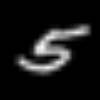

In [ ]:
cv2_imshow(train_generator[0][0][0])

In [ ]:
train_generator[0][1][0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **3. Model**

## **3.1 Model Creation**

In [ ]:
from keras.models import Sequential
from keras.activations import relu,linear
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, InputLayer

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(Conv2D(64,(5,5),activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(11,activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 94, 94, 64)        51264     
                                                                 
 dropout_6 (Dropout)         (None, 94, 94, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 16)        9232      
                                                                 
 dropout_7 (Dropout)         (None, 45, 45, 16)        0         
                                                      

In [ ]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics= ['accuracy'])

## **3.2 Model Fitting**

In [ ]:
model.fit(train_generator,validation_data = val_generator ,epochs = 14)

Epoch 1/20
110/110 [==============================] - 8s 60ms/step - loss: 1.0845 - accuracy: 0.8168 - val_loss: 0.2935 - val_accuracy: 0.9182
Epoch 2/20
110/110 [==============================] - 7s 63ms/step - loss: 0.2269 - accuracy: 0.9344 - val_loss: 0.1782 - val_accuracy: 0.9455
Epoch 3/20
110/110 [==============================] - 9s 81ms/step - loss: 0.1498 - accuracy: 0.9534 - val_loss: 0.1682 - val_accuracy: 0.9489
Epoch 4/20
110/110 [==============================] - 6s 57ms/step - loss: 0.0921 - accuracy: 0.9699 - val_loss: 0.1789 - val_accuracy: 0.9398
Epoch 5/20
110/110 [==============================] - 7s 65ms/step - loss: 0.0605 - accuracy: 0.9804 - val_loss: 0.2074 - val_accuracy: 0.9455
Epoch 6/20
110/110 [==============================] - 8s 68ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.2335 - val_accuracy: 0.9330
Epoch 7/20
110/110 [==============================] - 6s 58ms/step - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.2151 - val_accuracy: 0.9455

## **3.3 Model Saving**

In [ ]:
model.save('model-1.h5')

# **4. Testing of Model**

## **4.1 1st test**

### Testing Image

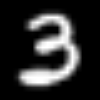

In [ ]:
cv2_imshow(test_generator[2][0][0])

### Testing Image Shape

In [ ]:
test_generator[2][0][0].shape

(100, 100, 3)

### True Output

In [ ]:
np.argmax(test_generator[2][1][0])

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Predictions

In [ ]:
np.argmax(model.predict(np.resize(test_generator[2][0][0],(1,100,100,3)),verbose = 0))

3

## Getting Accuracy Score on Testing Dataset

In [ ]:
from tqdm import tqdm

### Getting predictions on testing dataset

In [ ]:
y_pred = []
for i in tqdm(range(0,1100)):
  y_pred.append(np.argmax(model.predict(np.resize(test_generator[i][0][0],(1,100,100,3)),verbose = 0)))

100%|██████████| 1100/1100 [01:48<00:00, 10.14it/s]


### True Output of Testing dataset

In [ ]:
y_test = []
for i in tqdm(range(0,1100)):
  y_test.append(np.argmax(test_generator[i][1][0]))

100%|██████████| 1100/1100 [00:00<00:00, 2672.13it/s]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

0.94

## **2nd test**

In [ ]:
img = cv.imread('/content/test_image.jpg')

In [ ]:
img = cv.resize(img,(100,100),cv.INTER_CUBIC)

In [ ]:
img.shape

(100, 100, 3)

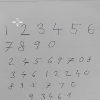

In [ ]:
cv2_imshow(img)

In [ ]:
np.argmax(model.predict(np.resize(img,(1,100,100,3))))

1/1 [==============================] - 0s 16ms/step


10